In [1]:
import pandas as pd

In [2]:
oil = pd.read_csv("../retail/oil.csv")

# Assignment 1: Simple Line Chart

Build a simple line plot for the oil series. Are there any interesting patterns here? 

What happened in 2014 to oil price?

In [3]:
oil.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


<Axes: >

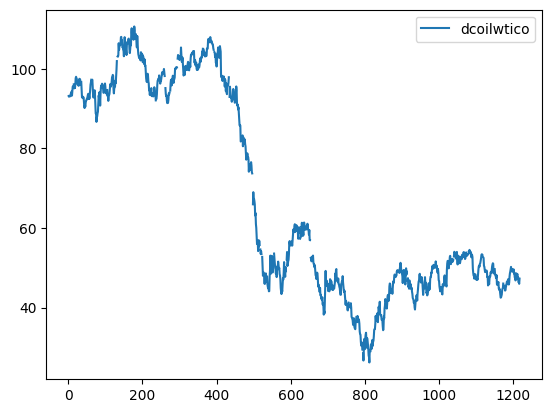

In [4]:
oil.plot()

<Axes: xlabel='date'>

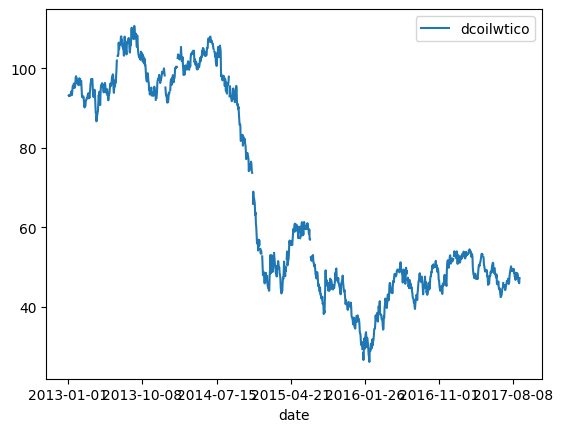

In [5]:
oil.plot(x="date")

<Axes: >

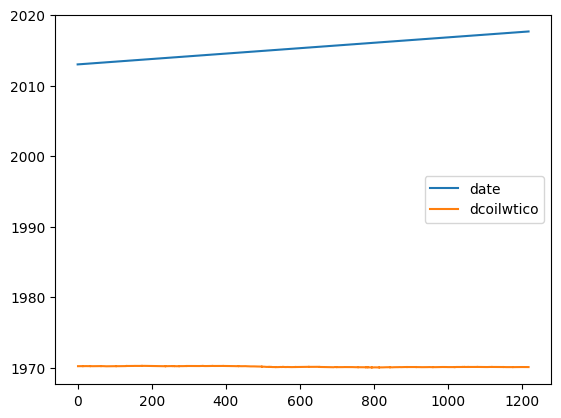

In [7]:
oil.astype({"date": "datetime64[ns]"}).plot()

<Axes: xlabel='date'>

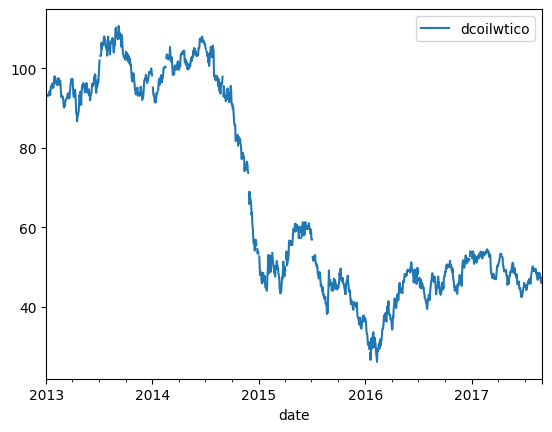

In [8]:
oil.astype({"date": "datetime64[ns]"}).plot(x="date")

<Axes: xlabel='date'>

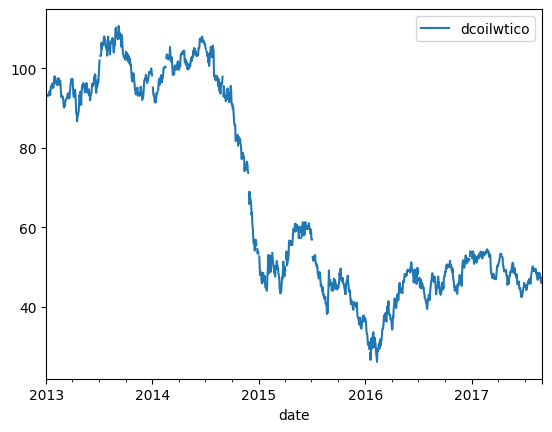

In [9]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").plot()

<Axes: xlabel='date'>

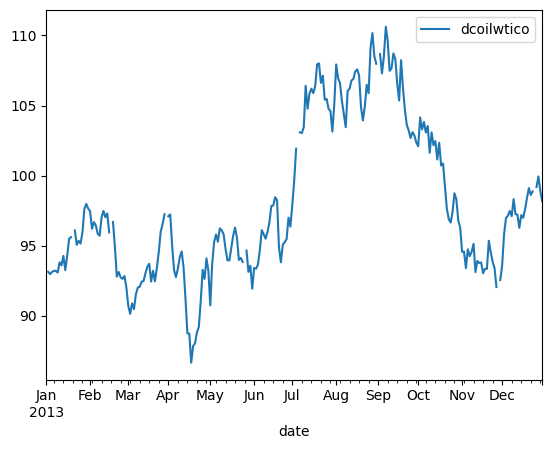

In [10]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").loc["2013"].plot()

<Axes: xlabel='date'>

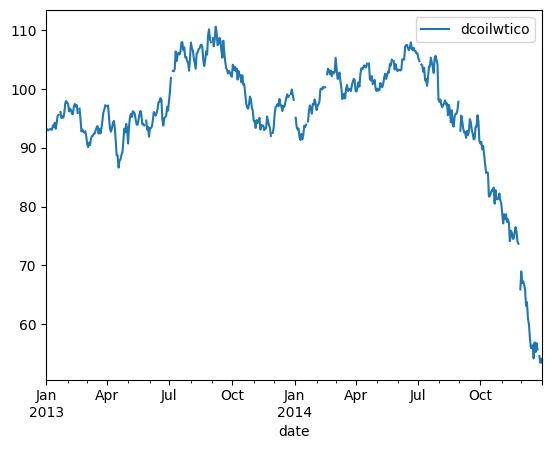

In [11]:
oil.astype({"date":"datetime64[ns]"}).set_index("date").loc["2013":"2014"].plot()

<Axes: xlabel='date'>

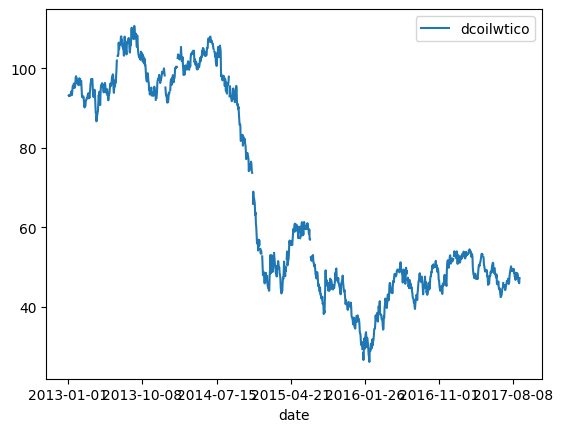

In [12]:
oil.plot(x='date')

<Axes: xlabel='date'>

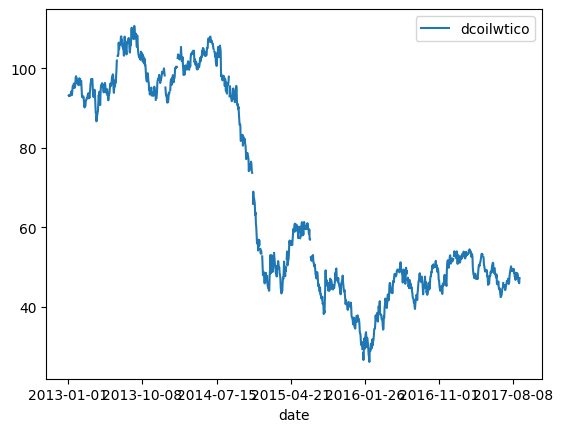

In [13]:
# Using set index
(oil
 .set_index("date")
 .plot()
)

<Axes: xlabel='date'>

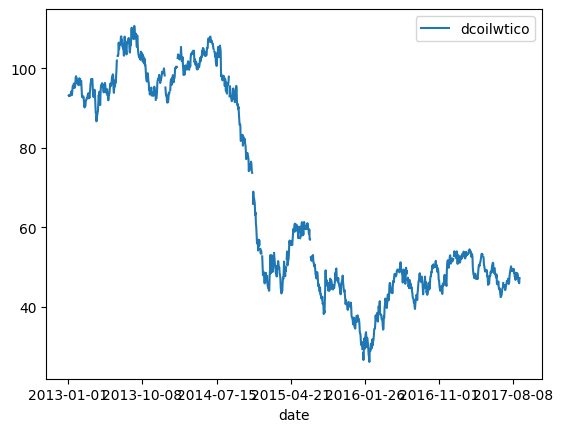

In [14]:
# Using x= argument
oil.plot(x='date')

<Axes: xlabel='date'>

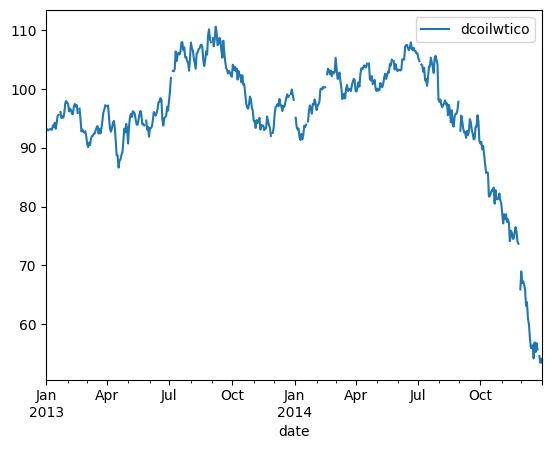

In [16]:
# Example with oil price as datetime instead of object -- more later!
(oil
 .astype({"date": "datetime64[ns]"})  # Convert date to datetime64
 .set_index("date")
 .loc["2013":"2014"]  # nice filtering here with dates
 .plot()
)

# Assignment 2: Upgraded Line Chart


Give your chart a style, add axis titles, and change the color of the line to black. 

Consider converting the date column to datetime64.

Rename the column to a more intuitive name for the audience.

In [18]:
import seaborn as sns

sns.set_style("darkgrid")

In [19]:
oil = oil.rename(columns={"dcoilwtico": "Oil Price"})

oil

,date,Oil Price
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20
...,...,...
1213,2017-08-25,47.65
1214,2017-08-28,46.40
1215,2017-08-29,46.46
1216,2017-08-30,45.96


<Axes: title={'center': 'Oil Price 2013-2017'}, xlabel='Date', ylabel='USD Price'>

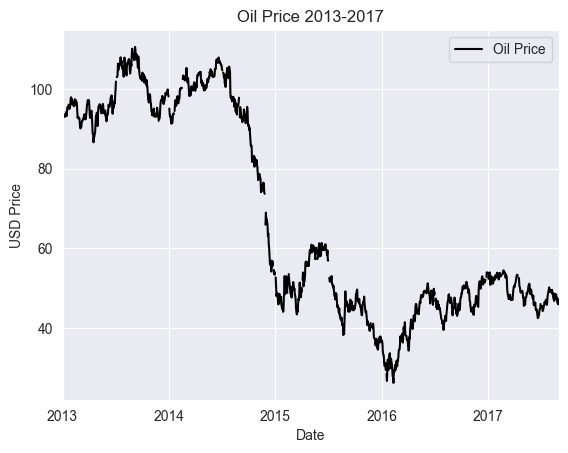

In [21]:
(oil
 .set_index(oil["date"].astype("datetime64[ns]"))
 .plot(
    title="Oil Price 2013-2017", 
    xlabel="Date", 
    ylabel="USD Price", 
    c="Black")
)

# Assignment 3: Subplots

Filter the transactions table to stores 1, 2, 3 and 4, then reshape it so each row is a date, and the columns of the table are the transactions for each store. 

Once you've done that, create a 2x2 plot of transactions by store, with one plot for each store.

Thanks!

In [22]:
transactions = pd.read_csv("../retail/transactions.csv")

stores_1234 = (transactions
                .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]  #filter to stores 1, 2, 3, 4
                .pivot_table(index="date", columns="store_nbr") # Createa pivot table
                .droplevel(0, axis=1))  # drop outer layer of column axis

In [24]:
stores_1234 = (pd.read_csv("../retail/transactions.csv")
                .loc[transactions["store_nbr"].isin([1, 2, 3, 4])]
                .pivot_table(index="date", columns="store_nbr")
                .droplevel(0, axis=1))

In [25]:
stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


array([[<Axes: xlabel='date'>, <Axes: xlabel='date'>],
       [<Axes: xlabel='date'>, <Axes: xlabel='date'>]], dtype=object)

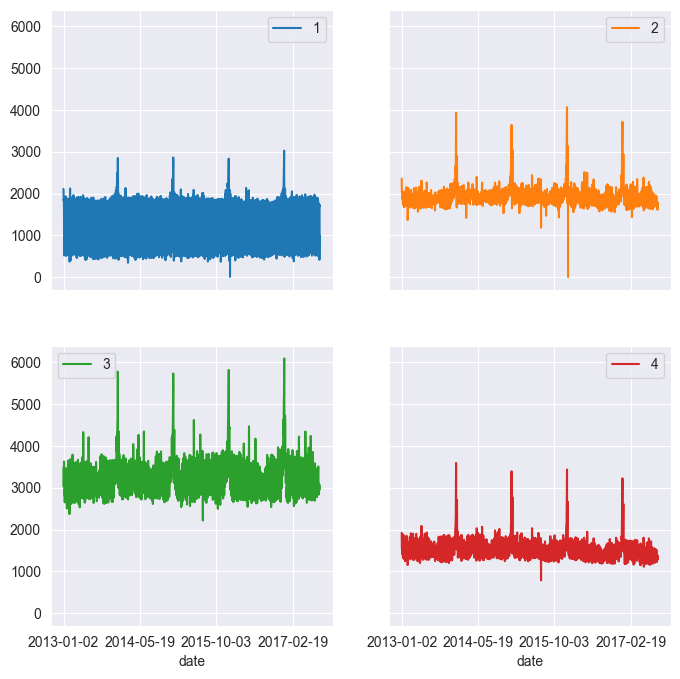

In [26]:
stores_1234.plot(subplots=True,   # create subplots
                 layout=(2, 2),   # in a 2x2 layour
                 figsize=(8, 8),  # increase figure size
                 sharey=True)     # share y-axis among plots for better comparison

# Assignment 4: Bar Charts

Create a sorted Bar chart of total sales by store number for stores 1, 2, 3 and 4.

Then create a horizontal stacked bar chart of sales by month, stacked by store number. 

In [27]:
# convert dates to datetime64

stores_1234.index = stores_1234.index.astype("datetime64[ns]") 

stores_1234

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0
...,...,...,...,...
2017-08-11,570.0,1698.0,2991.0,1301.0
2017-08-12,1004.0,1613.0,3070.0,1304.0
2017-08-13,416.0,1658.0,3075.0,1378.0


<Axes: xlabel='store_nbr'>

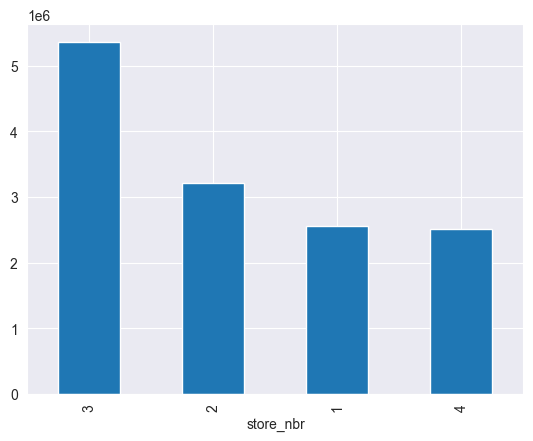

In [28]:
# create bar chart of total sales for each series, sorted high to low

stores_1234.sum().sort_values(ascending=False).plot.bar()

In [29]:
# Calculate monthly sum for each store groupbed by month

# stores_1234.index.month will allow you to groupby the month!

stores_1234_monthly = stores_1234.groupby(stores_1234.index.month).sum()

stores_1234_monthly

store_nbr,1,2,3,4
date,,,,
1,229203.0,284134.0,463260.0,222075.0
2,209400.0,265922.0,437238.0,209211.0
3,232178.0,293076.0,487224.0,231837.0
4,229081.0,287325.0,478308.0,223928.0
5,231160.0,293588.0,491961.0,228753.0
6,231514.0,284835.0,474668.0,222678.0
7,236032.0,288783.0,484698.0,224327.0
8,202821.0,255475.0,431752.0,200100.0
9,182035.0,228658.0,379101.0,178172.0


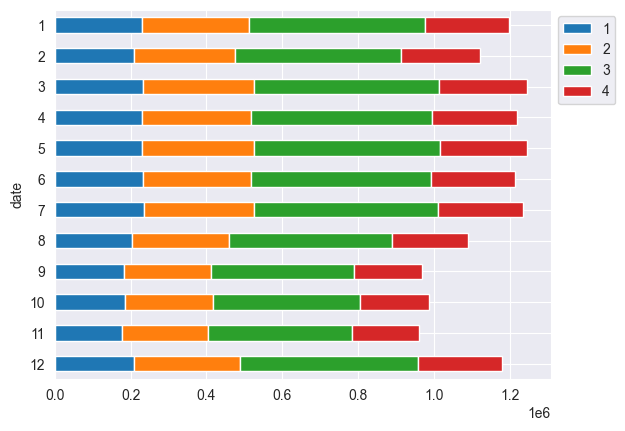

In [30]:
(stores_1234_monthly
 .sort_index(ascending=False)    # sort in ascending order so lowest comes first (technically this code is redundant)
 .plot.barh(stacked=True)        # created stacked bar chart (will stack by column names)
 .legend(bbox_to_anchor=(1, 1))  # Move legend to better location
)

# Assignment 5: Scatterplots

Plot the relationship between store 2 and store 3 sales.

Color the dots by month.

Use `c=stores_1234.index.month` to do so.

In [31]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: xlabel='3', ylabel='2'>

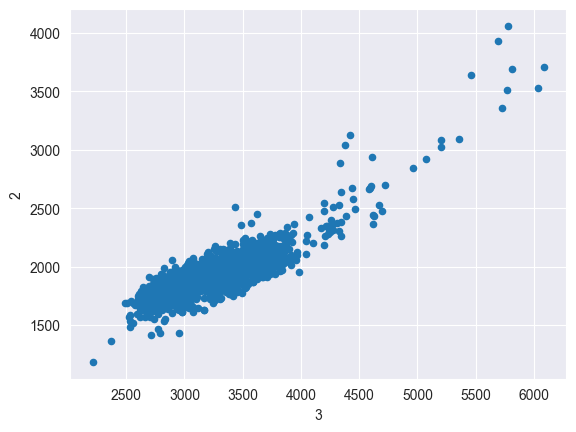

In [32]:
stores_1234.plot.scatter(x=3, y=2) # you could have flipped x and y, not a problem

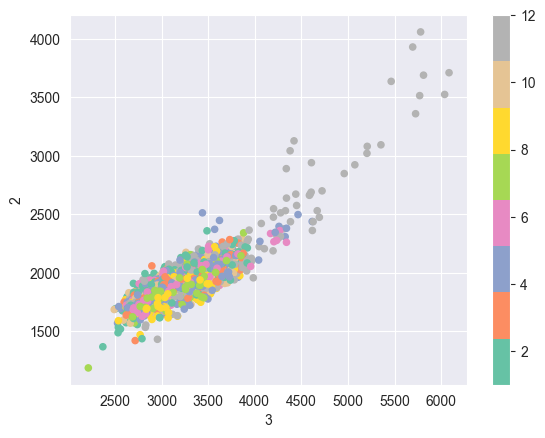

In [33]:
stores_1234.plot.scatter(x=3, 
                         y=2, 
                         c=stores_1234.index.month,  # color by month
                         colormap="Set2");           # specify colormap "Set2", choose your own!

<Axes: >

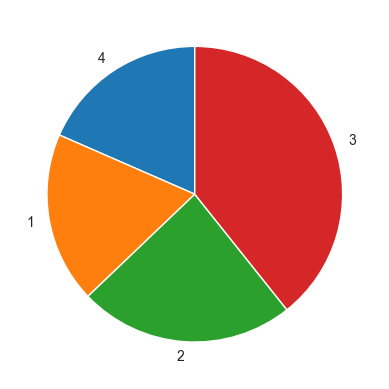

In [34]:
# Example pie chart for reference

(stores_1234
 .sum()                        # sums of stores
 .sort_values(ascending=True)  # Sort from low to high
 .plot 
 .pie(startangle=90)           # start first slice at 12 o'clock
)

# Assignment 6: Histograms

Hi there,

Can you plot the distributions of sales for stores 2 and 3?

I want to see how often store 2 has sales similar to store 3, as well as if there are any outlier type days.

Thanks!


In [35]:
stores_1234.head()

store_nbr,1,2,3,4
date,,,,
2013-01-02,2111.0,2358.0,3487.0,1922.0
2013-01-03,1833.0,2033.0,3026.0,1551.0
2013-01-04,1863.0,2066.0,3188.0,1596.0
2013-01-05,1509.0,2062.0,3623.0,1825.0
2013-01-06,520.0,1992.0,3590.0,1891.0


<Axes: ylabel='Frequency'>

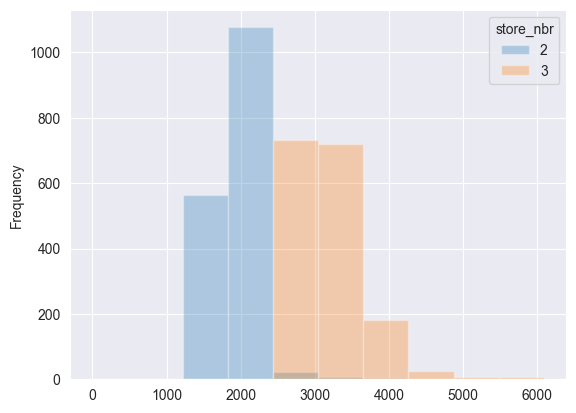

In [36]:
# grab columns for stores 2 and 3, plot a histogram with transparency specified by alpha
stores_1234.loc[:, [2, 3]].plot.hist(alpha=.3)